# Data Exploration for Machine Learning Education Projects:

 * ## Image Captioning Problem

 * ## Text Generation Problem

### *Disclaimer:*
* #### *Hardware:*
* ###### CPU: Intel Core i5-7300HQ
* ###### RAM: 16 GB
* ###### GPU: Nvidia GTX 1050 | 2GB
* #### *Keras Backend: Tensorflow 2.1 GPU*
* #### *On this kernel, all models are already trained and loaded; however, Training specs are displayed for evidence purposes and metric visualization.* 

## Image Captioning Problem 

### Six JSON files.
- #### ```captions``` are the main files for this problem
- #### ```instances``` and ```person_keypoints``` have more input concerning object detection and segmentation; therefore, these might provide a seminal mapping to ovelap contentes among text generation and object detection. This way, text generation for any given image parcially stops being agnostic. 

### So, in order to understand the hierarchy within each JSON file, we explore several keys in the encoded dictionaries. 


In [1]:
import json
import os

from IPython.core.interactiveshell import InteractiveShell # All outputs are displayed for every cell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
f = 'codelab/annotations/'

os.listdir(f)

ks = ['images', 'annotations']
for file in os.listdir(f):
    with open(f+file, 'r') as rf:
        d = json.load(rf)
    print(file, d.keys())
    
    for k in ks: 
        print('\t', k, len(d[k]))
        print('\t\t', d[k][0].keys())

['captions_train2014.json',
 'captions_val2014.json',
 'instances_train2014.json',
 'instances_val2014.json',
 'person_keypoints_train2014.json',
 'person_keypoints_val2014.json']

captions_train2014.json dict_keys(['info', 'images', 'licenses', 'annotations'])
	 images 82783
		 dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
	 annotations 414113
		 dict_keys(['image_id', 'id', 'caption'])
captions_val2014.json dict_keys(['info', 'images', 'licenses', 'annotations'])
	 images 40504
		 dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
	 annotations 202654
		 dict_keys(['image_id', 'id', 'caption'])
instances_train2014.json dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])
	 images 82783
		 dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
	 annotations 604907
		 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
instances_val2014.json dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])
	 images 40504
		 dict_keys(['license', 'f

## Training Data Summary

- ### 82,783 images;
- ### each one with either five (82586), six (196) or seven (1) captions.
- ### there are 414,113 captions.
- ### Originally, there are no letters with special symbols (ticks, primes, diaresis) (English Language)
- ### A homologated corpus to lower cases and deleting punctuation marks gives 23,130 unique words.
- ### La longest Caption has 49 words, the shortest has 5 words and, on average, captions are 10.45 words long. Hence a positively skewed (right skewed) distribution is in place. 
- ### Regarding image sizes, the lowest height and width are 51 and 59 pixels respectively; however, maximum height and width are 640 pixels, each. The average width is 578 pixels and the average height is 438.6 pixels. Anyhow, both metrics have quasi-bimodal distributions with peaks aproximately around 500 and 640 pixels, each.

## Validation Data Summary

- ### 40,504 images;
- ### each one with either five (40373), six (128) or seven (3) captions.
- ### there are 202,654 captions.
- ### Originally, there are no letters with special symbols (ticks, primes, diaresis) (English Language)
- ### A homologated corpus to lower cases and deleting punctuation marks gives 17,350 unique words.
- ### The longest Caption has 50 words, the shortest has 6 words and, on average, captions are 10.45 words long. Hence a positively skewed (right skewed) distribution is in place. 
- ### Regarding image sizes, the lowest height and width are 111 and 120 pixels respectively; however, maximum height and width are 640 pixels, each. The average width is 576.5 pixels and the average height is 485 pixels. Anyhow, both metrics have quasi-bimodal distributions with peaks aproximately around 470 and 640 pixels, each.


In [8]:
#JSON's hierarchy exploration
with open(f+'captions_train2014.json', 'r') as rf:
    tr_data = json.load(rf)
    
with open(f+"captions_val2014.json", 'r') as rf:
    v_data = json.load(rf)
    
print('\nTrain keys: ', tr_data.keys())

print('\nCaptions: {}'.format(len(tr_data['annotations'])), tr_data['annotations'][0].keys())
print('Images: {}'.format(len(tr_data['images'])), tr_data['images'][0].keys())

print('\nValidation keys: ', v_data.keys())

print('\nCaptions: {}'.format(len(v_data['annotations'])), v_data['annotations'][0].keys())
print('Images: {}'.format(len(v_data['images'])), v_data['images'][0].keys())


Train keys:  dict_keys(['info', 'images', 'licenses', 'annotations'])

Captions: 414113 dict_keys(['image_id', 'id', 'caption'])
Images: 82783 dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])

Validation keys:  dict_keys(['info', 'images', 'licenses', 'annotations'])

Captions: 202654 dict_keys(['image_id', 'id', 'caption'])
Images: 40504 dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
#import nltk
import re

from collections import Counter

In [10]:
# Json's dictionaries to pandas' Dataframes.

tr_caps = pd.DataFrame(tr_data['annotations'])
v_caps = pd.DataFrame(v_data['annotations'])

tr_imgs = pd.DataFrame(tr_data['images'])
v_imgs = pd.DataFrame(v_data['images'])

In [11]:
# How many captions does every image has?

cs = {}
for id_, c in Counter(list(tr_caps['image_id'])).most_common():
    if c not in cs.keys():
        cs[c] = 0
    cs[c] += 1
print('Train: ', cs)

cs = {}
for id_, c in Counter(list(v_caps['image_id'])).most_common():
    if c not in cs.keys():
        cs[c] = 0
    cs[c] += 1
print('Val: ', cs)

Train:  {7: 1, 6: 196, 5: 82586}
Val:  {7: 3, 6: 128, 5: 40373}



Training
Unique Words: 23130
Max Number of Words in a Caption: 49
Min Number of Words in a Caption: 5
Average Number of Words in all captions: 10.458350740015407



Validation
Unique Words: 17350
Max Number of Words in a Caption: 50
Min Number of Words in a Caption: 6
Average Number of Words in all captions: 10.452623683717075


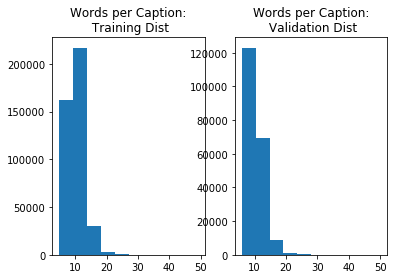

In [17]:
# Data exploration: Captions and Images
# NLP preprocessing: Lowercase all captions and erase punctation marks.

titles = [ 'Training', 'Validation']
for i, caps in enumerate([tr_caps, v_caps]):
    w = []
    words = ''
    lc = caps['caption']
    
    for cap in tqdm(lc):
        w.append(len(cap.split()))
        words += ' ' + cap.lower() + ' '
        
    words = re.split(r'\W+', words)
    words = Counter(words)
    
    print(titles[i])
    print('Unique Words: {}'.format(len(words)))
    print('Max Number of Words in a Caption: {}'.format(max(w)))
    print('Min Number of Words in a Caption: {}'.format(min(w)))
    print('Average Number of Words in all captions: {}'.format(np.mean(np.array(w))))
    plt.subplot(1, 2, i+1);
    plt.hist(np.array(w));
    plt.title('Words per Caption:\n {} Dist'.format(titles[i]));
plt.show();
    


 Training 
             license        height         width             id
count  82783.000000  82783.000000  82783.000000   82783.000000
mean       2.818054    483.590206    578.045794  290998.758900
std        1.511456     96.855347     92.020402  167952.307935
min        1.000000     51.000000     59.000000       9.000000
25%        1.000000    426.000000    500.000000  144726.000000
50%        3.000000    480.000000    640.000000  291797.000000
75%        4.000000    512.000000    640.000000  435936.500000
max        7.000000    640.000000    640.000000  581921.000000

 Validation 
             license        height         width             id
count  40504.000000  40504.000000  40504.000000   40504.000000
mean       2.826536    485.069944    576.541477  290741.634086
std        1.494372     97.766584     91.872464  168164.031110
min        1.000000    111.000000    120.000000      42.000000
25%        1.000000    426.000000    500.000000  145585.000000
50%        3.000000    480.

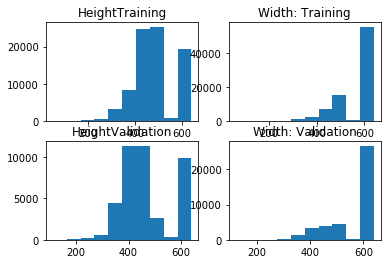

In [36]:
#Images descriptive statistics and distributions

for i, imgs in enumerate([tr_imgs, v_imgs]):
    print('\n {} \n'.format(titles[i]), imgs.describe())
    
    plt.subplot(2,2, 2*i+1);
    plt.hist(imgs['height']);
    plt.title('Height{}'.format(titles[i]));
    plt.subplot(2,2, 2*i+2);
    plt.hist(imgs['width']);
    plt.title('Width: {}'.format(titles[i]));
plt.show();


## Data transformation by dint of our preliminary model: Google's Inception V.3™

### Training and Validation dictionaries structure: ``` {image_id: list(captions)} ```

### Seize this process to transform captions into lowercase, erase punctuation marks and spaces on every string's ends.  

### Ascertain that the images are named congruently with the databases. 

### We find out that training and validation vocabulary has 4,189 words that are NOT shared. Going through a deeper processing, we can ameliorate this discrepancy. For instance, taking some percentage of the vocabulary with higher incidency or changing every word to its morphological root. Here, we'll get rid of all the words that appear only once on the Machine Learning Kernel. 



In [37]:
# ascertain file names are congruent with the databases. 

imgsTr = tr_imgs['file_name'].to_list()
imgsV = v_imgs['file_name'].to_list()

imgs_v = os.listdir('codelab/val2014/')
imgs_tr = os.listdir('codelab/train2014/')

print(set(imgsTr) == set(imgs_tr), set(imgsV) == set(imgs_v))

del imgsTr, imgsV, imgs_v, imgs_tr

True True


In [38]:
# create dictionaries and preprocess captions

tr_captions, v_captions = dict(), dict()

for dic, caps in zip([tr_captions, v_captions], [tr_caps, v_caps]):
    ids_ = caps['image_id']
    for id_ in tqdm(ids_):
        lc = caps.loc[caps['image_id'] == id_, 'caption'].to_list()
        id_ = str(id_)
        while len(id_) < 12:
            id_ = '0'+id_
        dic[id_] = [' '.join(re.split(r'\W+', c.lower())).strip() for c in lc]

len(tr_captions)
len(v_captions)

82783

40504

In [ ]:
InteractiveShell.ast_node_interactivity = "last"# all o none

In [46]:
# Assess if vocabulary ovelaps between Training and Validation data

voc_tr, voc_v = set(), set()

for dic, voc in zip([tr_captions, v_captions],[voc_tr, voc_v]):
    for k in dic.keys():
        [voc.update(cap.split()) for cap in dic[k]]

print('Tr: ', len(voc_tr), 'Val: ', len(voc_v))


n_voc = list(voc_v - voc_tr)
        
print('Number of Words Not Shared Among Training and Validation Datasets:', len(n_voc))
voc = voc_tr.union(voc_v)
print('Total words:', len(voc))

Tr:  23129 Val:  17349
Number of Words Not Shared Among Training and Validation Datasets: 4189
Total words: 27318


In [66]:
# Write Caption Files for ML

lines = list()
for k, caps in tr_captions.items():
    [lines.append(k + ' ' + cap) for cap in caps]
    
con = '\n'.join(lines)
with open('codelab/tr_captions.txt', 'w') as file:
    file.write(con)

lines = list()
for k, caps in v_captions.items():
    [lines.append(k + ' ' + cap) for cap in caps]
    
con = '\n'.join(lines)
with open('codelab/v_captions.txt', 'w') as file:
    file.write(con)

13261316

In [50]:
# provisional code for vocabulary reduction according to an outlier theshold percentage(outlier_th)
voc_tr, voc_v = '', ''

for k, caps in tr_captions.items():
    voc_tr += ' ' + ' '.join(caps) + ' '

for k, caps in v_captions.items():
    voc_v += ' ' + ' '.join(caps)

voc_tr, voc_v = Counter(voc_tr.split()).most_common(), Counter(voc_v.split()).most_common()

outlier_th = .99

t_tr, t_v = 0, 0
for _, c in voc_tr:
    t_tr += c

for _, c in voc_v:
    t_v += c

bag_por = 0
n_W = 0
new_voc_tr, new_voc_v = [], []

for w,c in voc_tr:
    if bag_por <= outlier_th:
        n_W += c
        bag_por = n_W/t_tr
        new_voc_tr.append(w)
    else:
        break
        
bag_por = 0
n_W = 0

for w,c in voc_v:
    if bag_por <= outlier_th:
        n_W += c
        bag_por = n_W/t_v
        new_voc_v.append(w)
    else:
        break
        
print('New Tr: ', len(new_voc_tr), 'New Val: ', len(new_voc_v))


new_n_voc = list(set(new_voc_v) - set(new_voc_tr))
        
print('Number of Words Not Shared Among Training and Validation New Datasets:', len(new_n_voc))
new_voc = set(new_voc_tr).union(set(new_voc_v))
print('New Total words:', len(new_voc))


New Tr:  5939 New Val:  5800
Number of Words Not Shared Among Training and Validation New Datasets: 585
New Total words: 6524


## Text Generation Problem

### Files: one XLS and two TXT

- #### ```health_claim_data_submit.xls``` has 564 headlines 
- #### ```keywords.txt``` has 270 keywords
- #### ```kewwords-test.txt``` has 8 keywords

### For the Headlines' database, the corpus has 5791 words , to which 1631 are unique once transformed into lowercase and erasing puntuation.

### Joining training and testing keywords (278 words), we assess their presence in the training headlines. The assessment shows that 226 words are not in the database, meaning that the training will not see them if the dataset is left as it is.

### To tackle this data deficiency, two strategies were followed:

- #### Grab the [New York Times Comments and Headlines](https://www.kaggle.com/aashita/nyt-comments) database and search for the missing keywords on those headlines. If there's an occurence, it will be added to the dataset. 
- #### Scrap [Reuters Archive for Health News Website](https://www.reuters.com/news/archive/healthNews) searching for the missing keywords on all headlines. Then again, if there's an occurence, it will be added to the dataset. 


In [91]:
import pandas as pd
import numpy as np
from collections import Counter
import re

hc_file = "codelab/health_claim_data_submit.xls"
kw_file = "codelab/keywords.txt"
test_kw = "codelab/keywords-test.txt"

InteractiveShell.ast_node_interactivity = "all"# last o none

In [92]:
# xls to pandas DataFrame
hc = pd.read_excel(hc_file)
print('DataFrame columns: ', hc.columns)
print('Number of headlines: ', len(hc))

DataFrame columns:  Index(['news_topic', 'news_title', 'reported_date', 'source',
       'health_claim_or_not', 'IV', 'relation', 'DV', 'multiple_IV'],
      dtype='object')
Number of headlines:  564


In [77]:
# Headlines
newts = hc['news_title'].to_list()
newts = [' '.join(re.split(r'\W+', nt.lower().strip())) for nt in newts]
nt_words = [word for nt in newts for word in nt.split()]
print( 'total words: ', len(nt_words), 'unique words: ', len(set(nt_words)))

total words:  5791 unique words:  1631


In [78]:
# Training Keywords
with open(kw_file, 'r') as f:
    kw = f.read()
kw = kw.replace(',', '').split('\n')

kw = [' '.join(re.split(r'\W+', w.lower().strip())) for w in kw]
print('total keywords: ', len(kw), 'unique keywords:',  len(set(kw)))

total keywords:  270 unique keywords: 270


In [79]:
# Testing Keywords
with open(test_kw, 'r') as f:
    test_kw = f.read()
test_kw = test_kw.replace(',', '').split('\n')
print('total testing keywords: ', len(test_kw))

total testing keywords:  8


In [80]:
# From all keywords, how many are not in the training dataset?
kws = kw + test_kw

n_kw = list(set(kws) - set(nt_words))
print('Number of Words Not Shared Among keywords and training datasets:', len(n_kw))

Number of Words Not Shared Among keywords and training datasets: 226


In [81]:
# New York Times Headlines dataset loading and extracting usable headlines

all_headlines = []
for filename in os.listdir('Articles/'):
    if 'Articles' in filename:
        article_df = pd.read_csv('Articles/'+filename) 
        all_headlines.extend(list(article_df.headline.values))

all_headlines = [h for h in all_headlines if h != "Unknown"]
print('All headlines within the archives: ', len(all_headlines))

print('Number of Missing Keywords: ', len(kws))
print('Number of Usable Headlines: ', len(newts))


for w in kws:
    occ = 0
    for hl in all_headlines:
        if w.strip().lower() in hl.lower():
            newts.append(hl)
            occ = 1
    if occ == 1: kws.remove(w)

print('Number of Missing Keywords After Extraction: ', len(kws))
print('Number of Usable Headlines After Extraction: ', len(newts))

All headlines within the archives:  8603
Number of Missing Keywords:  278
Number of Usable Headlines:  564
Number of Missing Keywords After Extraction:  183
Number of Usable Headlines After Extraction:  11052


In [89]:
# Scrapping Reuters Health News Website (takes around 1:30 hours with WiFi. 
#                                         Possibly it may be faster with an ethernet cable connection)

from bs4 import BeautifulSoup as bs
import requests as rq
from tqdm.notebook import tqdm

url = 'https://www.reuters.com/news/archive/healthNews?view=page&page={}&pageSize=10'

reuter_hl = []
last_page = 3277
for i in tqdm(range(1, last_page)):
    s = rq.get(url.format(i)).text
    s = bs(s, 'html5lib')
    for h in s.find_all('h3'):
        new_hl = h.contents[0].strip()
        reuter_hl.append(new_hl.lower())


Number of Missing Keywords:  183
Number of Usable Headlines:  11052


107
Number of Missing Keywords After Extraction:  107
Number of Usable Headlines After Extraction:  17131


In [99]:
print('Number of Missing Keywords: ', len(kws))
print('Number of Usable Headlines: ', len(newts))

for w in tqdm(kws):
    occ = 0
    for hl in reuter_hl:
        if w.strip().lower() in hl.lower():
            newts.append(hl)
            reuter_hl.remove(hl)
            occ = 1
    if occ == 1: kws.remove(w)
    print(len(kws), end = '\r')

    
print('Number of Missing Keywords After Extraction: ', len(kws))
print('Number of Usable Headlines After Extraction: ', len(newts))

Number of Missing Keywords:  60
Number of Usable Headlines:  19288


60
Number of Missing Keywords After Extraction:  60
Number of Usable Headlines After Extraction:  19288


In [110]:
InteractiveShell.ast_node_interactivity = "none"# last o none

In [112]:
with open('codelab/newsHL.txt', 'w') as f:
    [f.write(line+'\n') for line in newts]